In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Resources/Autism.csv")
# # Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# # Drop the null rows
df = df.dropna()
pd.set_option('display.max_columns', None)
print(df.shape)
df

(1117, 23)


,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,0,27,f,white,no,no,Russia,no,0,17 and more,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,1,21,f,white,no,no,Germany,no,10,17 and more,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,0,18,m,black,no,no,United States,no,5,17 and more,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,1,49,m,black,no,no,Mexico,no,7,17 and more,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,0,18,m,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,2486,0,1,1,0,0,0,0,0,0,0,51,f,white,no,yes,New Zealand,no,2,17 and more,english,self,NO
1114,2487,1,1,1,1,1,1,1,1,1,1,43,m,white,no,no,United Kingdom,no,10,17 and more,english,self,YES
1115,2489,1,0,0,0,0,0,1,1,1,1,43,m,white,yes,yes,United Kingdom,no,5,17 and more,english,self,NO
1116,2492,1,1,0,1,1,1,0,1,0,1,21,f,white,no,no,United States,no,7,17 and more,english,self,YES


In [3]:
df.Used_App_Before.value_counts()

no     1095
yes      22
Name: Used_App_Before, dtype: int64

In [4]:
df['Screening Type'].value_counts()

17 and more    1117
Name: Screening Type, dtype: int64

In [5]:
df.drop(['Used_App_Before','Screening Type'], axis=1, inplace=True)
df.head()
print(df.shape)

(1117, 21)


In [6]:
# Check for missing values
df.isna().sum().sum()

0

In [7]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family_ASD,Residence,Score,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,0,27,f,white,no,no,Russia,0,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,1,21,f,white,no,no,Germany,10,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,0,18,m,black,no,no,United States,5,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,1,49,m,black,no,no,Mexico,7,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,0,18,m,aboriginal,no,no,Indonesia,4,english,self,NO


In [8]:
df.dtypes

Case No        int64
A1             int64
A2             int64
A3             int64
A4             int64
A5             int64
A6             int64
A7             int64
A8             int64
A9             int64
A10            int64
Age            int64
Sex           object
Ethnicity     object
Jaundice      object
Family_ASD    object
Residence     object
Score          int64
Language      object
User          object
Class         object
dtype: object

In [9]:
df = pd.get_dummies(df)
df.head()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Score,Sex_f,Sex_m,Ethnicity_aboriginal,Ethnicity_asian,Ethnicity_black,Ethnicity_hispanic,Ethnicity_latino,Ethnicity_middle eastern,Ethnicity_others,Ethnicity_south asians,Ethnicity_white,Jaundice _no,Jaundice _yes,Family_ASD_no,Family_ASD_yes,Residence_Afghanistan,Residence_AmericanSamoa,Residence_Angola,Residence_Antigua and Barbuda,Residence_Argentina,Residence_Armenia,Residence_Aruba,Residence_Australia,Residence_Austria,Residence_Azerbaijan,Residence_Bahamas,Residence_Bahrain,Residence_Bangladesh,Residence_Belgium,Residence_Bolivia,Residence_Brazil,Residence_Burundi,Residence_Canada,Residence_Chile,Residence_China,Residence_Costa Rica,Residence_Croatia,Residence_Cyprus,Residence_Czech Republic,Residence_Denmark,Residence_Djibouti,Residence_Ecuador,Residence_Egypt,Residence_Ethiopia,Residence_Finland,Residence_France,Residence_French Guiana,Residence_Germany,Residence_Honduras,Residence_Hong Kong,Residence_Hungary,Residence_Iceland,Residence_India,Residence_Indonesia,Residence_Iran,"Residence_Iran, Islamic Republic of",Residence_Iraq,Residence_Ireland,Residence_Italy,Residence_Japan,Residence_Jordan,Residence_Kazakhstan,Residence_Lebanon,Residence_Malaysia,Residence_Mexico,Residence_Nepal,Residence_Netherlands,Residence_New Zealand,Residence_Nicaragua,Residence_Niger,Residence_Norway,Residence_Oman,Residence_Pakistan,Residence_Peru,Residence_Philippines,Residence_Poland,Residence_Portugal,Residence_Qatar,Residence_Romania,Residence_Russia,Residence_Saint Kitts and Nevis,Residence_Saudi Arabia,Residence_Serbia,Residence_Sierra Leone,Residence_Singapore,Residence_South Africa,Residence_Spain,Residence_Sri Lanka,Residence_Sweden,Residence_Switzerland,Residence_Taiwan,Residence_Thailand,Residence_Tonga,Residence_Turkey,Residence_Turkmenistan,Residence_Ukraine,Residence_United Arab Emirates,Residence_United Kingdom,Residence_United States,Residence_Uruguay,Residence_Viet Nam,"Residence_Virgin Islands, U.S.",Residence_Zambia,Language_arabic,Language_english,Language_farsi,Language_french,Language_mandarin,Language_portuguese,Language_russian,Language_spanish,Language_turkish,Language_urdu,User_friend,User_health care professional,User_others,User_parent,User_relative,User_self,User_teacher,Class_NO,Class_YES
0,6,0,0,0,0,0,0,0,0,0,0,27,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,10,1,1,1,1,1,1,1,1,1,1,21,10,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,12,1,1,0,1,1,0,0,1,0,0,18,5,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,16,1,0,0,0,1,1,1,1,1,1,49,7,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,20,1,1,1,0,0,0,0,1,0,0,18,4,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


Text(0.5, 1.0, 'Distribution of Those With versus Those Without ASD')

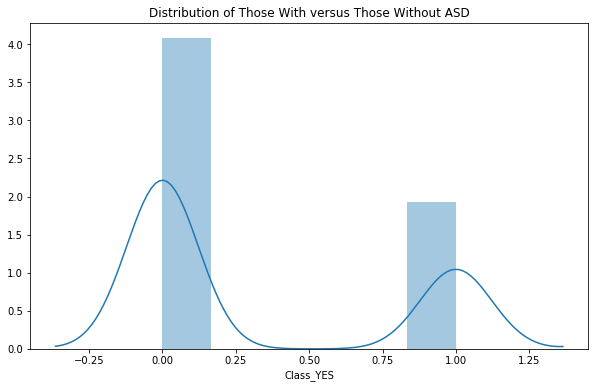

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,6))
sns.distplot(df['Class_YES']).set_title('Distribution of Those With versus Those Without ASD')

# INDEPENDENT VARIABLES

## Age

In [11]:
print("Total # of Distinct Ages:", df.Age.value_counts().size)
print("Value Counts:", df.Age.value_counts())

Total # of Distinct Ages: 53
Value Counts: 21    66
20    62
22    59
23    55
18    52
29    46
19    45
24    44
27    44
30    44
17    43
26    40
25    37
28    36
35    35
31    28
32    28
37    28
33    27
36    27
40    26
42    23
44    21
34    21
38    20
43    20
39    19
46    12
47    12
50    12
41    11
45    10
52     9
55     8
48     7
53     7
49     5
51     4
54     3
56     3
60     2
61     2
76     2
59     2
58     2
62     1
63     1
64     1
67     1
69     1
70     1
71     1
80     1
Name: Age, dtype: int64


Text(0.5, 1.0, 'Age Distribution of People Taking the Test')

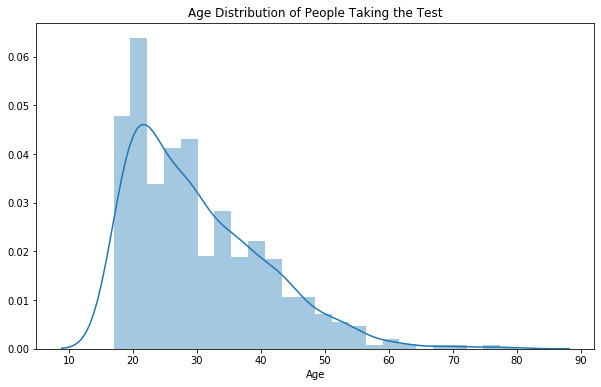

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,6))
sns.distplot(df['Age']).set_title('Age Distribution of People Taking the Test')

Age is not normally distributed. It's right-skewed. Does this matter? Unsure.

In [13]:
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

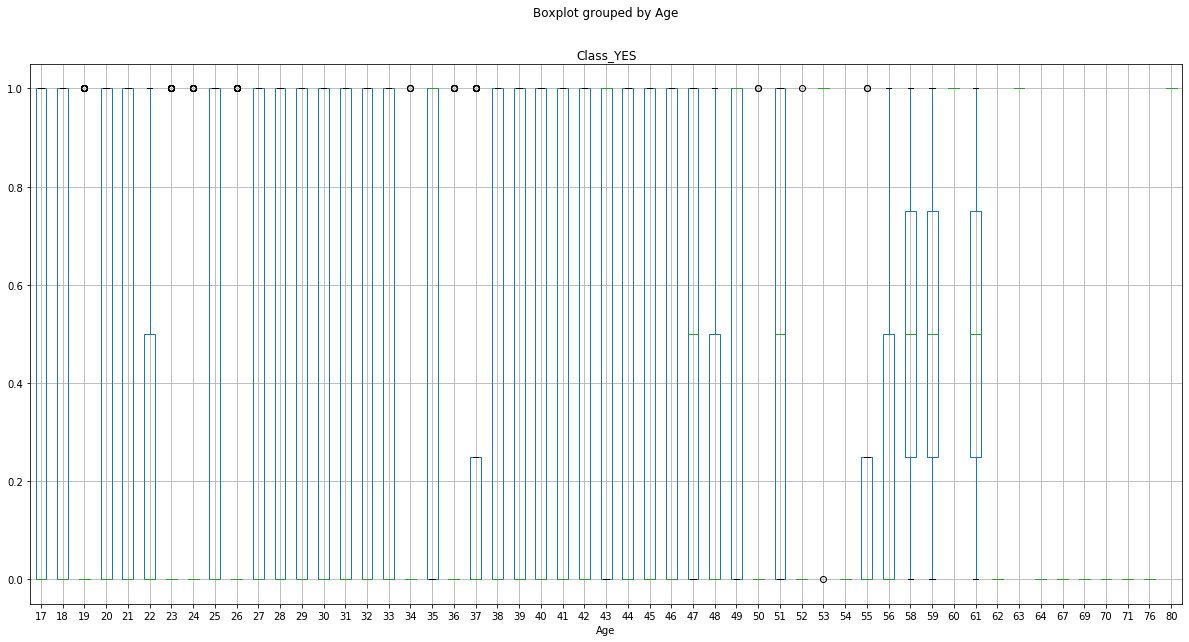

In [14]:
df.boxplot("Class_YES", by="Age", figsize=(20, 10))

In [15]:
print(df["Age"].max())
print(df["Age"].min())

80
17


In [16]:
bins = [17, 24, 34, 44, 54, 64, 90]
group_labels = ["<25", "25-34", "35-44", "45-54", "55-64", "65+" ]
df["Age_Group"] = pd.cut(df["Age"], bins, labels=group_labels)

In [17]:
# Total number of questionaaire partcipipants by bin
age_counts = df["Age_Group"].value_counts()
age_counts

<25      383
25-34    351
35-44    230
45-54     81
55-64     22
65+        7
Name: Age_Group, dtype: int64

In [18]:
age_df = pd.DataFrame({"Total Count": age_counts})
age_df

,Total Count
<25,383
25-34,351
35-44,230
45-54,81
55-64,22
65+,7


In [19]:
# Age group has now been added as a column to our ogiinal dataframe
# Now I can do a box plot
df.head()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Score,Sex_f,Sex_m,Ethnicity_aboriginal,Ethnicity_asian,Ethnicity_black,Ethnicity_hispanic,Ethnicity_latino,Ethnicity_middle eastern,Ethnicity_others,Ethnicity_south asians,Ethnicity_white,Jaundice _no,Jaundice _yes,Family_ASD_no,Family_ASD_yes,Residence_Afghanistan,Residence_AmericanSamoa,Residence_Angola,Residence_Antigua and Barbuda,Residence_Argentina,Residence_Armenia,Residence_Aruba,Residence_Australia,Residence_Austria,Residence_Azerbaijan,Residence_Bahamas,Residence_Bahrain,Residence_Bangladesh,Residence_Belgium,Residence_Bolivia,Residence_Brazil,Residence_Burundi,Residence_Canada,Residence_Chile,Residence_China,Residence_Costa Rica,Residence_Croatia,Residence_Cyprus,Residence_Czech Republic,Residence_Denmark,Residence_Djibouti,Residence_Ecuador,Residence_Egypt,Residence_Ethiopia,Residence_Finland,Residence_France,Residence_French Guiana,Residence_Germany,Residence_Honduras,Residence_Hong Kong,Residence_Hungary,Residence_Iceland,Residence_India,Residence_Indonesia,Residence_Iran,"Residence_Iran, Islamic Republic of",Residence_Iraq,Residence_Ireland,Residence_Italy,Residence_Japan,Residence_Jordan,Residence_Kazakhstan,Residence_Lebanon,Residence_Malaysia,Residence_Mexico,Residence_Nepal,Residence_Netherlands,Residence_New Zealand,Residence_Nicaragua,Residence_Niger,Residence_Norway,Residence_Oman,Residence_Pakistan,Residence_Peru,Residence_Philippines,Residence_Poland,Residence_Portugal,Residence_Qatar,Residence_Romania,Residence_Russia,Residence_Saint Kitts and Nevis,Residence_Saudi Arabia,Residence_Serbia,Residence_Sierra Leone,Residence_Singapore,Residence_South Africa,Residence_Spain,Residence_Sri Lanka,Residence_Sweden,Residence_Switzerland,Residence_Taiwan,Residence_Thailand,Residence_Tonga,Residence_Turkey,Residence_Turkmenistan,Residence_Ukraine,Residence_United Arab Emirates,Residence_United Kingdom,Residence_United States,Residence_Uruguay,Residence_Viet Nam,"Residence_Virgin Islands, U.S.",Residence_Zambia,Language_arabic,Language_english,Language_farsi,Language_french,Language_mandarin,Language_portuguese,Language_russian,Language_spanish,Language_turkish,Language_urdu,User_friend,User_health care professional,User_others,User_parent,User_relative,User_self,User_teacher,Class_NO,Class_YES,Age_Group
0,6,0,0,0,0,0,0,0,0,0,0,27,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,25-34
1,10,1,1,1,1,1,1,1,1,1,1,21,10,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,<25
2,12,1,1,0,1,1,0,0,1,0,0,18,5,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,<25
3,16,1,0,0,0,1,1,1,1,1,1,49,7,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,45-54
4,20,1,1,1,0,0,0,0,1,0,0,18,4,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,<25


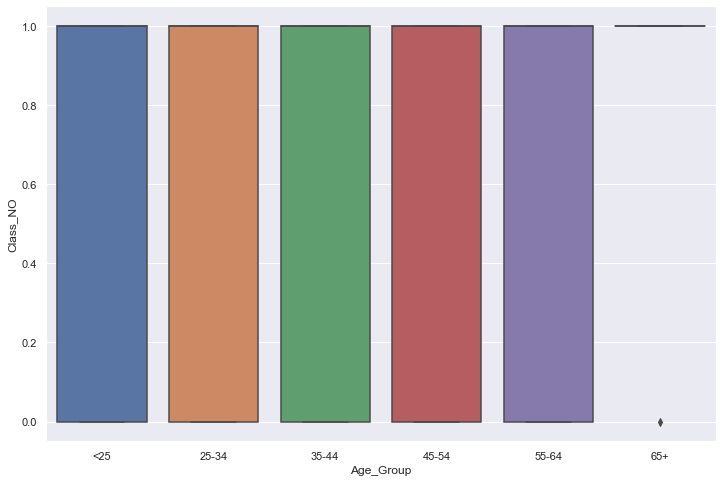

In [20]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.boxplot(x='Age_Group', y='Class_NO', data=df)

I don't think a boxplot would work well here since we only have values of 0's and 1's.

In [31]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="Jaundice_no", y="Score", data=df, split=True,
                inner="quart", palette={'0': "r", '1': "b"})
sns.despine(left=True)

ValueError: Could not interpret input 'Jaundice_no'